In [1]:
import pandas as pd
from pathlib import Path

from pandas.plotting import boxplot

In [2]:
data_path = Path("../data")
stop_it_path = data_path / "stop_it_with_code_book.xlsx"

In [3]:
stop_it = pd.read_excel(stop_it_path, sheet_name="stop_it_clean")

In [6]:
stop_it.head()

,SDAN,Input File,Home vs InPerson,S1 vs S2,Average Run Go RT,Stop % Accuracy,Stop % Incorrect,Go % Accuracy,Go % Incorrect,Go % Omission,...,Avr_Tired,count_included,count_excluded,# of trials in Block 1,# of trials in Block 2,# of trials in Block 3,# of trials in Block 4,# of trials in Block 5,# of trials in others,TrialType
0,rn23001,C:\Users\97254\OneDrive - mail.tau.ac.il\ \ -...,NaN,NaN,776.328418,58.490566,41.509434,88.787879,0.00000,11.212121,...,35.000000,436.0,4.0,85.0,88.0,88.0,88.0,87.0,0.0,baseline
1,rn23001,C:\Users\97254\OneDrive - mail.tau.ac.il\ \ -...,NaN,NaN,670.172298,48.598131,51.401869,96.969697,0.30303,2.727273,...,81.000000,437.0,3.0,88.0,85.0,88.0,88.0,88.0,0.0,home1
2,rn23001,C:\Users\97254\OneDrive - mail.tau.ac.il\ \ -...,NaN,NaN,834.039872,60.377358,39.622642,89.696970,0.30303,10.000000,...,77.666667,436.0,4.0,88.0,87.0,86.0,87.0,88.0,0.0,home2
3,rn23001,C:\Users\97254\OneDrive - mail.tau.ac.il\ \ -...,NaN,NaN,838.702393,60.000000,40.000000,91.212121,0.00000,8.787879,...,85.000000,435.0,5.0,87.0,87.0,85.0,88.0,88.0,0.0,home3
4,rn23001,C:\Users\97254\OneDrive - mail.tau.ac.il\ \ -...,NaN,NaN,811.046650,60.000000,40.000000,94.848485,0.00000,5.151515,...,39.000000,435.0,5.0,87.0,87.0,85.0,88.0,88.0,0.0,home4


In [4]:
col_to_remove = [
"Input File",
    "Home vs InPerson",
    "S1 vs S2"
]
stop_it = stop_it.drop(columns=col_to_remove)
stop_it.columns

Index(['SDAN', 'Average Run Go RT', 'Stop % Accuracy', 'Stop % Incorrect',
       'Go % Accuracy', 'Go % Incorrect', 'Go % Omission', 'Median Go RT',
       'Average SSD', 'SSRT', 'Post Go Error Go % Accuracy',
       'Post Go Error Go RT', 'Post Go Error Efficiency',
       'Post Any Error Go % Accuracy', 'Post Any Error Go RT',
       'Post Any Error Efficiency', 'normal_correct_percentage', 'EXCLUDE',
       'Pre_Tense', 'Pre_Angry', 'Pre_Annoyed', 'Pre_Happy', 'Pre_Tired',
       'Mid_Tense', 'Mid_Angry', 'Mid_Annoyed', 'Mid_Happy', 'Mid_Tired',
       'Post_Tense', 'Post_Angry', 'Post_Annoyed', 'Post_Happy', 'Post_Tired',
       'Avr_Tense', 'Avr_Angry', 'Avr_Annoyed', 'Avr_Happy', 'Avr_Tired',
       'count_included', 'count_excluded', '# of trials in Block 1',
       '# of trials in Block 2', '# of trials in Block 3',
       '# of trials in Block 4', '# of trials in Block 5',
       '# of trials in others', 'TrialType'],
      dtype='object')

In [5]:
feature = "Average SSD"
par = "rn23049"

In [6]:
cur = (stop_it[stop_it["SDAN"] == par])
print(cur[feature])

120           NaN
121    388.834951
122           NaN
123    350.000000
124    202.500000
125           NaN
Name: Average SSD, dtype: float64


In [7]:
quartiles = stop_it.groupby('TrialType')[feature].quantile([0.25, 0.75]).unstack()
quartiles

,0.25,0.75
TrialType,,
baseline,210.023585,356.129808
home1,186.837411,317.124002
home2,184.659240,318.822115
home3,179.357798,281.839623
home4,172.174179,282.783019
home5,180.051458,285.259514


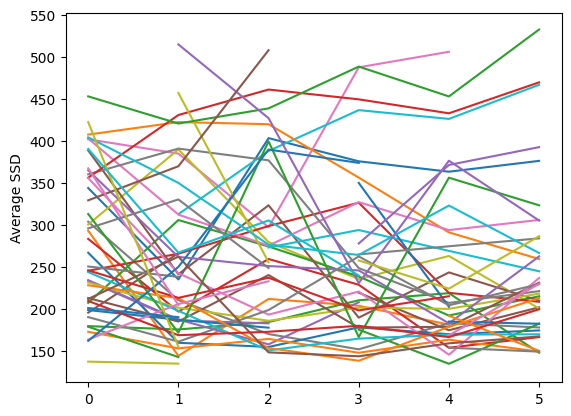

In [8]:
go_rt = stop_it[["SDAN", feature]]

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for idx, group in go_rt.groupby('SDAN'):
    ax.plot(group[feature].values, label=str(idx))

ax.set_ylabel(feature)
plt.show()

In [9]:
from imputer import Imputer

imp = Imputer(stop_it, {feature:"linear"})
stop_it = imp.impute()

KeyboardInterrupt: 

In [11]:
cur = (stop_it[stop_it["SDAN"] == par])
print(cur[feature])

120    356.129808
121    388.834951
122    318.822115
123    350.000000
124    202.500000
125    180.051458
Name: Average SSD, dtype: float64


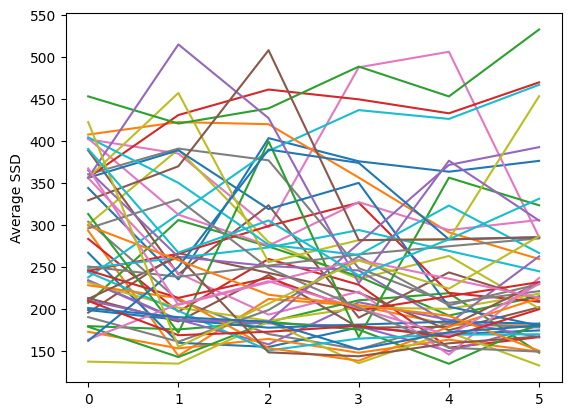

In [17]:
go_rt = stop_it[["SDAN", feature]]

fig, ax = plt.subplots()

for idx, group in go_rt.groupby('SDAN'):
    ax.plot(group[feature].values, label=str(idx))

ax.set_ylabel(feature)
plt.show()

In [18]:
(go_rt.groupby('SDAN').count())[feature].min()

np.int64(6)